**Sharvari Lahane**
**Data Science - Batch May 2024 (Baner, Pune) - Assignment 7**
**Logistic Regression**

**Task 1: Data Exploration**

In [1]:
import pandas as pd

Loading the datasets

In [3]:
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Examining the features, their types, and summary statistics

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Summary statistics for numerical features

In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Summary statistics for categorical features

In [13]:
print(train_data.describe(include=['O']))

                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


In [14]:
print(test_data.describe(include=['O']))

                    Name   Sex    Ticket            Cabin Embarked
count                418   418       418               91      418
unique               418     2       363               76        3
top     Kelly, Mr. James  male  PC 17608  B57 B59 B63 B66        S
freq                   1   266         5                3      270


Creating visualizations

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Creating a histogram for the Age feature in the Titanic_train dataset

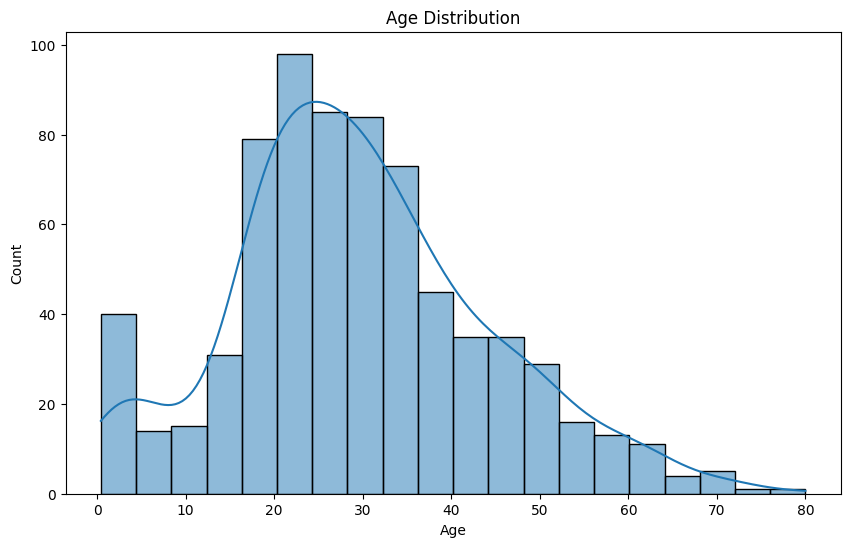

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

Creating a box plot for the Fare feature in the Titanic_train dataset

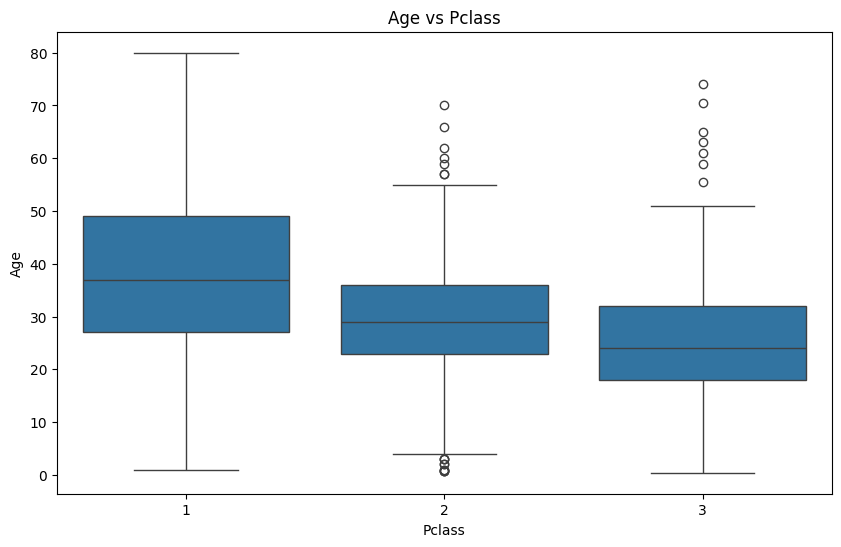

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.title('Age vs Pclass')
plt.show()

Creating a pair plot for the Age and Fare features in the Titanic_train dataset

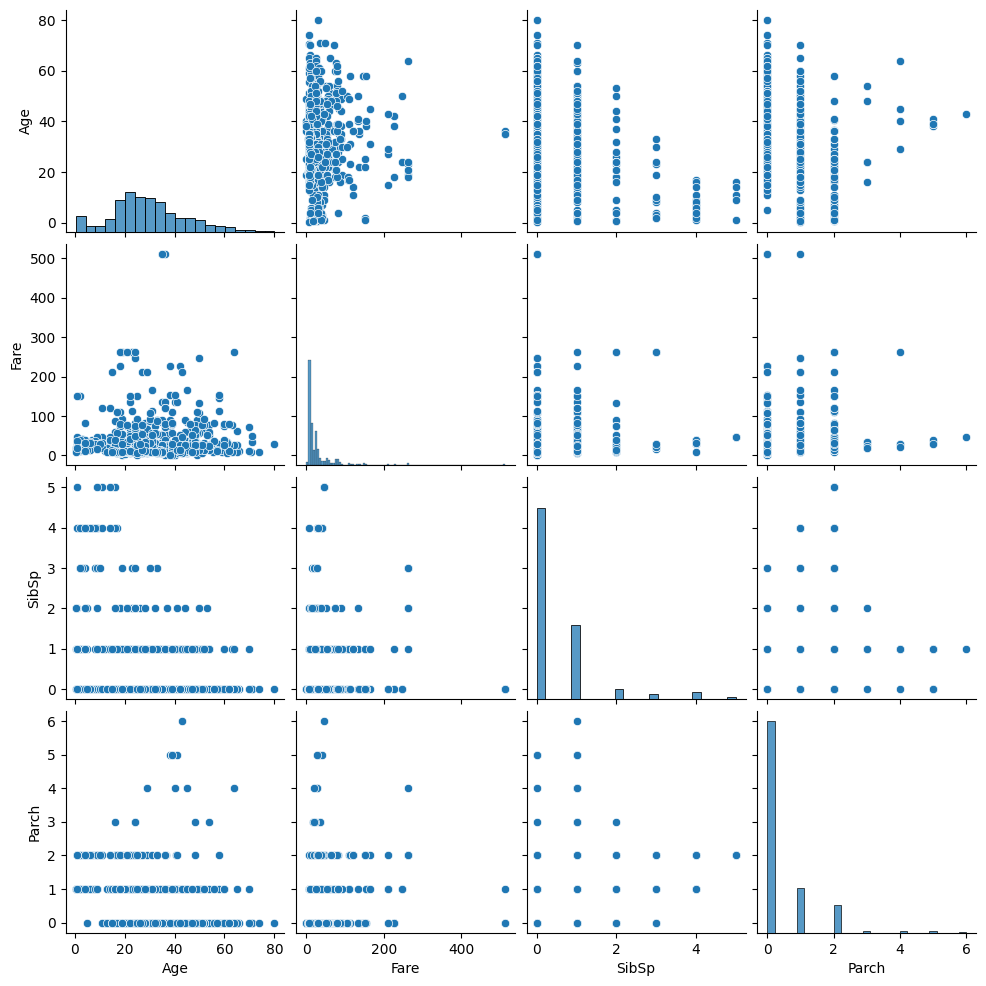

In [18]:
selected_features = ['Age', 'Fare', 'SibSp', 'Parch']
sns.pairplot(train_data[selected_features].dropna())
plt.show()

Heatmap of correlations between numerical features

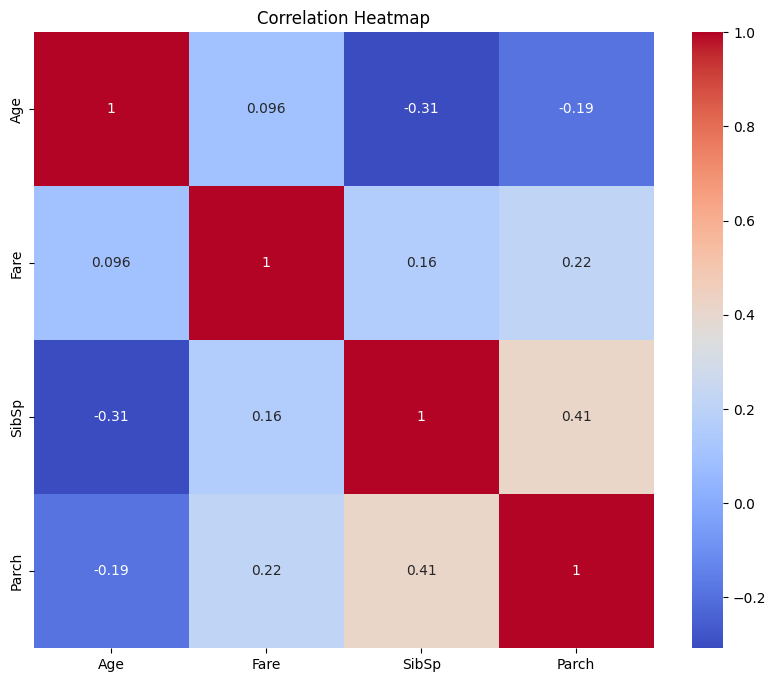

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##**Task 2: Data Preprocessing**

Filling missing Age values with median age

In [21]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

Filling missing Embarked values with the most common port

In [22]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

Filling missing Fare values with median fare

In [23]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

Encoding categorical variables

In [24]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [27]:
train_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False


In [28]:
test_data

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,True,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",27.0,0,0,A.5. 3236,8.0500,NaN,True,False,True
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,False,False,False
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,True,False,True
416,1308,3,"Ware, Mr. Frederick",27.0,0,0,359309,8.0500,NaN,True,False,True


Ensuring the test data has the same columns as the train data

In [26]:
test_data = test_data.reindex(columns=train_data.columns.drop('Survived'), fill_value=0)

##**Task 3: Model Building**

Importing necessary libraries

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Defining features and target variable

In [31]:
X_train = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y_train = train_data['Survived']

In [32]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,True,False,True
887,888,1,19.0,0,0,30.0000,False,False,True
888,889,3,28.0,1,2,23.4500,False,False,True
889,890,1,26.0,0,0,30.0000,True,False,False


In [33]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


Splitting the training data into training and validation sets

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [35]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,332,1,45.5,0,0,28.5000,True,False,True
733,734,2,23.0,0,0,13.0000,True,False,True
382,383,3,32.0,0,0,7.9250,True,False,True
704,705,3,26.0,1,0,7.8542,True,False,True
813,814,3,6.0,4,2,31.2750,False,False,True
...,...,...,...,...,...,...,...,...,...
106,107,3,21.0,0,0,7.6500,False,False,True
270,271,1,28.0,0,0,31.0000,True,False,True
860,861,3,41.0,2,0,14.1083,True,False,True
435,436,1,14.0,1,2,120.0000,False,False,True


In [36]:
X_val

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
709,710,3,28.0,1,1,15.2458,True,False,False
439,440,2,31.0,0,0,10.5000,True,False,True
840,841,3,20.0,0,0,7.9250,True,False,True
720,721,2,6.0,0,1,33.0000,False,False,True
39,40,3,14.0,1,0,11.2417,False,False,False
...,...,...,...,...,...,...,...,...,...
433,434,3,17.0,0,0,7.1250,True,False,True
773,774,3,28.0,0,0,7.2250,True,False,False
25,26,3,38.0,1,5,31.3875,False,False,True
84,85,2,17.0,0,0,10.5000,False,False,True


In [37]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [38]:
y_val

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


Initializing and train the logistic regression model

In [40]:
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

##**Task 4: Model Evaluation**

Evaluating the Model

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

Predicting on the validation set

In [43]:
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

In [44]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [45]:
y_pred_proba

array([0.07501523, 0.23292631, 0.17760213, 0.90163289, 0.57742119,
       0.93645157, 0.58739696, 0.09614218, 0.64680806, 0.90346497,
       0.3144263 , 0.10081599, 0.45140146, 0.08530679, 0.20663026,
       0.94530656, 0.33623753, 0.62663433, 0.29476708, 0.32495004,
       0.13182042, 0.40323338, 0.63543506, 0.16809759, 0.13773941,
       0.08329701, 0.26111816, 0.25547878, 0.06896818, 0.66110769,
       0.18376003, 0.68352986, 0.40739825, 0.66046737, 0.14446618,
       0.08337608, 0.40280545, 0.5758547 , 0.90707436, 0.14477159,
       0.20087194, 0.0962555 , 0.15061224, 0.10941376, 0.47380529,
       0.086048  , 0.13396331, 0.1385697 , 0.12690914, 0.26865722,
       0.57889373, 0.87313664, 0.04763834, 0.5636355 , 0.0376047 ,
       0.94027961, 0.19972458, 0.92842239, 0.79218883, 0.61202003,
       0.14692328, 0.86338185, 0.78993227, 0.4066538 , 0.08525599,
       0.73155376, 0.31465531, 0.12473926, 0.08569047, 0.82681831,
       0.76580231, 0.93542433, 0.42929594, 0.86833551, 0.16659

Computing evaluation metrics

In [46]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

In [47]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.8045
Precision: 0.8000
Recall: 0.7027
F1 Score: 0.7482
ROC AUC Score: 0.8662


Visualizing the ROC curve

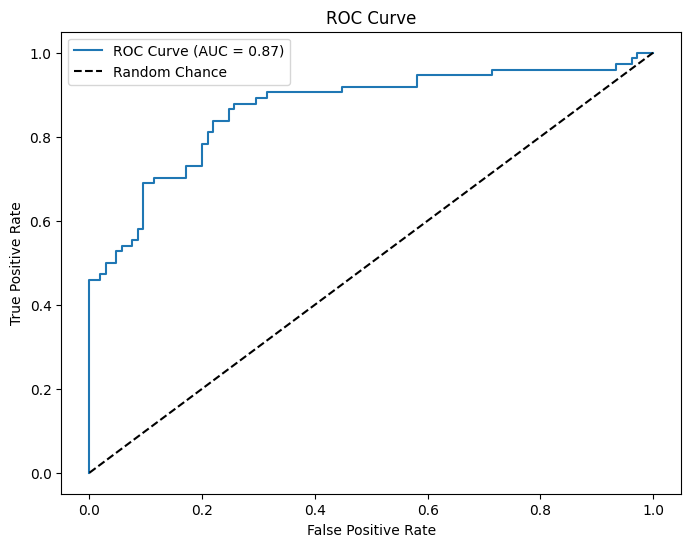

In [48]:
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##**Task 5: Interpretation**

Extracting model coefficients

In [49]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [50]:
feature_importance

,Feature,Coefficient,Importance
6,Sex_male,-2.677835,2.677835
1,Pclass,-0.783523,0.783523
8,Embarked_S,0.313215,0.313215
3,SibSp,-0.312366,0.312366
4,Parch,-0.135844,0.135844
7,Embarked_Q,-0.030251,0.030251
2,Age,-0.024551,0.024551
5,Fare,0.005374,0.005374
0,PassengerId,0.000465,0.000465


Interpretation

In [52]:
for feature, coef in zip(X_train.columns, model.coef_[0]):
    print(f"Feature: {feature}, Coefficient: {coef:.4f}")

Feature: PassengerId, Coefficient: 0.0005
Feature: Pclass, Coefficient: -0.7835
Feature: Age, Coefficient: -0.0246
Feature: SibSp, Coefficient: -0.3124
Feature: Parch, Coefficient: -0.1358
Feature: Fare, Coefficient: 0.0054
Feature: Sex_male, Coefficient: -2.6778
Feature: Embarked_Q, Coefficient: -0.0303
Feature: Embarked_S, Coefficient: 0.3132


**Discuss the significance of features in predicting the target variable.**

The coefficients represent the log-odds of survival for a one-unit increase in the predictor variable, holding all other variables constant.

A positive coefficient increases the probability of survival, while a negative coefficient decreases it.

## **Task 6: Deployment with Streamlit**

In [55]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [68]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

Loading the pre-trained model (replace with the actual path or model object)

In [67]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Streamlit app code

In [61]:
import warnings
warnings.filterwarnings('ignore')

st.title('Titanic Survival Prediction')

2024-08-31 07:16:00.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 07:16:00.595 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

Sidebar inputs

In [62]:
pclass = st.selectbox('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.slider('Age', 0, 80, 29)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 8, 0)
parch = st.slider('Number of Parents/Children Aboard', 0, 6, 0)
fare = st.number_input('Fare', min_value=0.0, max_value=500.0, value=32.0)
embarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S'])

2024-08-31 07:16:30.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 07:16:30.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 07:16:30.231 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 07:16:30.237 Session state does not function when running a script without `streamlit run`
2024-08-31 07:16:30.242 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 07:16:30.245 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 07:16:30.249 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 07:16:30.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 07:16

Preparing input data

In [63]:
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Sex_male': [1 if sex == 'male' else 0],
    'Embarked_Q': [1 if embarked == 'Q' else 0],
    'Embarked_S': [1 if embarked == 'S' else 0]
})

Prediction

In [64]:
if st.button('Predict'):
    survival_probability = model.predict_proba(input_data)[0][1]
    st.write(f'Predicted Survival Probability: {survival_probability:.2f}')

2024-08-31 07:17:23.780 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 07:17:23.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 07:17:23.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 07:17:23.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


**Interview Questions:**


**What is the difference between precision and recall?**

Precision and recall are two fundamental metrics used in evaluating a classification model's performance, particularly in binary classification. 

Understanding the difference between precision and recall is crucial for interpreting how well a model distinguishes between the two classes (e.g., positive and negative). 

1. Precision

- Precision measures the accuracy of positive predictions. 

- Precision, also known as Positive Predictive Value (PPV), is the ratio of true positive predictions (correctly predicted positive observations) to the total number of positive predictions made by the model (both true positives and false positives).

- Precision tells us how many of the positive predictions made by the model are correct. 

- It is a measure of a classifier’s accuracy in predicting positive outcomes.

- High precision means that when the model predicts a positive class, it is very likely correct. 

- Precision is particularly important in situations where the cost of false positives is high. 

- For example, in email spam detection, high precision means that most emails marked as spam are truly spam, which is important to avoid legitimate emails being incorrectly flagged.

2. Recall

- Recall, also known as Sensitivity or True Positive Rate (TPR), is the ratio of true positive predictions to the total number of actual positive cases in the data (the sum of true positives and false negatives).

- Recall measures how well a model can identify all the positive cases in the dataset. 

- High recall means that the model is good at capturing all the actual positives, even if it means including some false positives. 

- Recall is crucial when missing a positive case has a high cost. 

- For example, in a medical diagnostic test for a serious disease, high recall is important because it means that most patients with the disease are correctly identified (minimizing missed cases).

Difference Between Precision and Recall

- Focus:

Precision focuses on the accuracy of positive predictions. 

It is concerned with how many of the predicted positive cases are positive.

Recall focuses on capturing all the positive cases. 

It is concerned with how many actual positive cases were correctly predicted by the model.

- Trade-off:

There is often a trade-off between precision and recall. 

Increasing precision typically reduces recall, and vice versa. 

This is because making a model more conservative in predicting positives (to increase precision) may cause it to miss some actual positives (reducing recall), and making it more lenient in predicting positives (to increase recall) may cause it to include more false positives (reducing precision).

- Use Cases:

Precision is more important in cases where false positives are costly. 

For example, in fraud detection, a false positive could result in a legitimate transaction being flagged incorrectly.

Recall is more critical when it’s important to capture as many positives as possible, such as in medical screenings where missing a disease case could have severe consequences.

**What is cross-validation, and why is it important in binary classification?**

Cross-validation is a statistical technique used to assess the performance of a machine learning model, including those for binary classification, by testing the model on different subsets of the data. 

It is an essential method in model evaluation and selection, helping ensure that a model generalizes well to unseen data and is not overfitting to the training data.

- What is Cross-Validation?

Cross-validation involves dividing the dataset into several subsets (or "folds") and systematically training and evaluating the model on these subsets. 

The most common type of cross-validation is k-fold cross-validation.

K-Fold Cross-Validation:

In k-fold cross-validation, the dataset is divided into k equally sized folds or subsets. 

The model is trained k times, each time using a different fold as the validation set and the remaining k-1 folds as the training set. 

The process is as follows:

1. Divide the dataset into k subsets (folds).

2. For each fold:

Train the model using k-1 folds (i.e., all folds except one).

Test the model on the remaining fold (the validation set).
                                      
3. Compute a performance metric (e.g., accuracy, precision, recall) for each of the k models.
    
4. Average the results from the k iterations to obtain a more reliable estimate of the model's performance.

- Cross-validation is particularly important in binary classification for several reasons:

Avoids Overfitting:

Overfitting occurs when a model learns patterns specific to the training data, including noise, rather than the underlying distribution. 

This results in high performance on the training set but poor generalization to new data.

By training and testing on different subsets of the data, cross-validation provides a more accurate measure of a model's ability to generalize to unseen data, reducing the risk of overfitting.

Provides a Robust Evaluation:

In binary classification, the performance of a model can vary significantly depending on the specific data points included in the training and test sets. 

Cross-validation mitigates this by averaging the performance across multiple data splits.

This results in a more reliable estimate of the model’s performance, as it considers variability in the data and reduces the likelihood of random chance affecting the evaluation.

Efficient Use of Data:

In many machine learning problems, especially in domains like medicine or finance, datasets can be small or costly to obtain. 

Cross-validation makes efficient use of the entire dataset by ensuring that each data point is used for both training and validation at least once.

This is particularly beneficial in binary classification, where having enough examples of both classes (positive and negative) is crucial for training a balanced model.

Helps in Model Selection and Hyperparameter Tuning:

Cross-validation helps in choosing the best model and hyperparameters by providing a mechanism to evaluate multiple models and configurations on the same dataset.

For binary classification, different models or settings (e.g., different thresholds for classification, regularization parameters, or choice of algorithms like logistic regression vs. decision trees) can be evaluated using cross-validation, enabling a more informed decision on which model to deploy.

Reduces Bias in Model Performance Estimates:

If a dataset is split just once into a training set and a test set, the performance estimate can be biased due to the particular split used. 

This is especially problematic in binary classification if one class is underrepresented or if the split results in an imbalanced representation.

Cross-validation reduces this bias by averaging the performance over multiple folds, ensuring that every data point is used in training and testing, thereby providing a more unbiased estimate of model performance.

Handles Imbalanced Datasets:

In binary classification, the classes can be imbalanced (e.g., detecting fraudulent transactions where fraud is rare). 

Cross-validation can help mitigate the effects of class imbalance by ensuring that each fold has a representative distribution of classes.

Techniques like stratified k-fold cross-validation ensure that each fold maintains the same class proportion as the original dataset, providing more reliable performance metrics.